# Funções, bibliotecas e Dataframe ficticios

In [29]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import matplotlib.font_manager as fm #para alterar as fontes dos graficos
import seaborn as sns

import pyperclip

# Definindo o estilo de fonte e tema
fonte = fm.FontProperties(family="Calibri", style="italic")

sns.set_style('whitegrid') #cor da grade(fundo)

In [30]:
import pandas as pd
import numpy as np

# Manipulação e Tratamento de dados
import openpyxl
import pandas as pd
import numpy as np
from numpy import NaN

#ignorando Warning inuteis
import warnings 
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [31]:
import requests

# CARREGANDO BASE
arquivo = 'fake_database'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url)
#response = requests.get(url); code = response.text; exec(code)
#df = fake_database2(2250); df_bck = df.copy(); display(df.head())

arquivo = 'funcoes_estatisticas'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url)
response = requests.get(url); code = response.text; exec(code)

# Função para avaliação de modelos exibindo metricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
arquivo = 'ML_supervised_learning'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url); response = requests.get(url); code = response.text; exec(code)

print('TUDO OK')

https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/fake_database.py
https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/funcoes_estatisticas.py
https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/ML_supervised_learning.py
TUDO OK


In [32]:
def contribuicao_proba_tabela(df, coluna_analisada, model, sep=10):
    # Criar DataFrame para análise com a variável de interesse variando em um intervalo
    minimo, maximo = df[coluna_analisada].min(), df[coluna_analisada].max()
    df_analise_feature = pd.DataFrame({coluna_analisada: np.linspace(minimo, maximo, sep)})

    # Preencher as demais colunas com o valor médio
    for coluna in df.columns:
        if coluna != coluna_analisada:
            df_analise_feature[coluna] = df[coluna].mean()

    # Fazer previsão de probabilidade e adicionar ao DataFrame de análise
    df_analise_feature['predict_proba'] = model.predict_proba(df_analise_feature)[:, 1]

    # Retornar apenas a coluna analisada e a probabilidade prevista
    return df_analise_feature[[coluna_analisada, 'predict_proba']]

#x_data = pd.DataFrame(x_teste, columns=df.columns[:-1])
#resultado = contribuicao_proba_tabela(x_data, 'feature_4', modelo_m1, sep=10)
#resultado

def contribuicao_proba_grafico(resultado, coluna):
    cmap = plt.get_cmap('viridis')
    norm = plt.Normalize(resultado['predict_proba'].min(), resultado['predict_proba'].max())
    colors = cmap(norm(resultado['predict_proba']))

    ax = sns.barplot(x=resultado[coluna].round(1), 
                    y=resultado['predict_proba'], 
                    edgecolor='black',
                    palette=colors)

    for i, p in enumerate(ax.patches):
        abs_value = resultado['predict_proba'].iloc[i]
        text = f"{abs_value.round(2)}"
        ax.annotate(text, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=11)

    media = resultado['predict_proba'].mean()
    plt.axhline(y = media, color='red', linestyle='--')
    plt.text(0, media, 'Média = {:.2f}'.format(media), color = 'red', va='bottom', fontsize=11)

#plt.figure(figsize=(4,3))
#contribuicao_proba_grafico(resultado, 'feature_4')
#plt.show()

#def contribuicao_proba(x_data, modelo_m1, sep=10):
    # Loop através de todas as colunas de x_data
    #for i, column in enumerate(x_data.columns, 1):  # `enumerate` agora começa em 1
        #plt.subplot(10, 5, i)  # Subplots de 9 linhas e 6 colunas (9 * 6 = 54 subplots possíveis)
        #resultado = contribuicao_proba_tabela(x_data, column, modelo_m1, sep=10)
        #contribuicao_proba_grafico(resultado, column)

# Criando dataframe sintetico desbalanceado

In [33]:
from sklearn.datasets import make_classification
import pandas as pd

# Gerar dados sintéticos desbalanceados
x, y = make_classification(n_samples=10000, 
                           n_features=10, 
                           #n_informative=4,   # Aumentar o número de features informativas
                           n_redundant=4,
                           #n_classes=2, 
                           #n_clusters_per_class=5,  # Manter 5 clusters por classe
                           weights=[0.93, 0.07], 
                           class_sep=0.8,
                           random_state=3141592)

# Criar um DataFrame
df = pd.DataFrame(x, columns=[f'feature_{i}' for i in range(x.shape[1])])
df['target'] = y

# Ver a distribuição de classes
print(df['target'].value_counts(normalize=True))
print(df['target'].value_counts())

display(pd.concat([df.head(5), df.tail(5)]).T)
# Salvar para análise
#df.to_csv('imbalanced_dataset.csv', index=False)


target
0    0.9253
1    0.0747
Name: proportion, dtype: float64
target
0    9253
1     747
Name: count, dtype: int64


0         1         2         3         4         9995  \
feature_0 -0.278692 -0.412600 -2.022141 -0.690156 -1.316476 -0.934570   
feature_1 -1.085014 -1.025295  0.401499  0.705900 -0.785919 -0.915810   
feature_2 -1.719112  0.155747 -1.014127  0.543709 -0.778405 -0.996000   
feature_3 -0.692033 -0.804568 -1.888794 -0.429279 -1.626158 -1.289903   
feature_4 -1.353161 -1.424389 -1.574119  0.029561 -2.068312 -1.824886   
feature_5 -0.116487 -0.767695 -0.041634 -0.780975 -0.188522  0.271555   
feature_6 -1.332264 -1.328602 -0.499042  0.459973 -1.485290 -1.450940   
feature_7  0.512338 -0.437265  0.407397  1.400560 -0.832156 -1.041146   
feature_8 -0.559742 -0.563572 -0.286116  0.161907 -0.664127 -0.634758   
feature_9  0.196151 -1.071816 -0.925118 -0.061314  1.074396  0.538758   
target     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

               9996      9997      9998      9999  
feature_0 -1.083174 -0.611872 -1.595631 -1.554808  
feature_1 -0.681914 -0.735082 -0.044768 -0.854819  
feature_2  1.101237  1.190667  1.383699 -1.625335  
feature_3 -1.351328 -0.895808 -1.627299 -1.892773  
feature_4 -1.736917 -1.329773 -1.602378 -2.369639  
feature_5  0.950675 -0.052672  0.858411 -1.467553  
feature_6 -1.261153 -1.100068 -0.794412 -1.672879  
feature_7  1.089435  0.288293  0.357697  1.162850  
feature_8 -0.562527 -0.477404 -0.390749 -0.750878  
feature_9  0.110653 -1.574310 -0.058551  0.301499  
target     0.000000  0.000000  0.000000  0.000000

# Tratando o DataFrame

In [34]:
# Variavel Dependente
var_dep = 'target'
y = df[var_dep]
display(y.head())

x = df.drop(var_dep, axis=1)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [35]:
# DUMMYRIZAÇÃO
colunas_categoricas = []
colunas_binarias = []
colunas_mais3_categorias = []

for coluna in x.columns:
    if df[coluna].dtype == 'O':
        categorias = x[coluna].unique()
        if len(categorias) == 2:
            print('2 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_binarias.append(coluna)
        else:
            print('3 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_mais3_categorias.append(coluna)

############################################################################################
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder #transformando colunas com 2 categorias em 0 e 1

coluna = x.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'), #caso a coluna tenha apenas 2 categorias 
    colunas_categoricas), #passando quais são essas colunas
    remainder = 'passthrough', sparse_threshold=0) #oque deve ser feito com as outras

#Aplicando transformação
x = one_hot.fit_transform(x)

#Os novos nomes das colunas #'onehotencoder=transformadas; 'remainder'=não transformadas
novos_nomes_colunas = one_hot.get_feature_names_out(coluna)

x = pd.DataFrame(x, columns = novos_nomes_colunas) #alterando de volta
x_columns = x.columns.tolist() 

############################################################################################
# Normalização (scaling entre 0 e 1) com MinMaxScaler ******************************
from sklearn.preprocessing import MinMaxScaler
normalizacao = MinMaxScaler()
x = normalizacao.fit_transform(x)
# df['Close_normalizada'] = (df[coluna] - df[coluna].min()) / (df[coluna].max() - df[coluna].min())

# Padronização (média 0 e desvio padrão 1) com StandardScaler **********************
#from sklearn.preprocessing import StandardScaler
#padronizacao = StandardScaler()
#x = padronizacao.fit_transform(x)
# df['Close_padronizada'] = (df[coluna] - df[coluna].mean()) / df[coluna].std()

############################################################################################
# DEFININDO A VARIAVEL DEPENDENTE
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

############################################################################################
#backups
x_inteiro = x
y_inteiro = y

# DIVIDINDO BASE EM TREINO E TESTE
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, 
                                                    stratify = y, #para manter a proporção da Var Dep nos splits
                                                    random_state = 5) #raiz da aleatoridade
# test_size = 0.25 #porcentagem que ira ser separado para testes

print(x_treino.shape, x_teste.shape)
print(y_treino.shape, y_teste.shape)

(7500, 10) (2500, 10)
(7500,) (2500,)


# Instanciando modelos

In [36]:
sem_random = 3141592

from sklearn.dummy import DummyClassifier

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier, RidgeClassifierCV, SGDClassifier, Perceptron

from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.calibration import CalibratedClassifierCV

# Importar modelos de bibliotecas externas (XGBoost e LightGBM)

# Dicionário com todos os modelos
model_dict = {
    #'DummyClassifier': DummyClassifier(),
    
    # Modelos baseados em arvore
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=sem_random),
    'RandomForestClassifier': RandomForestClassifier(random_state=sem_random),
     # Modelos boosting
    'AdaBoostClassifier': AdaBoostClassifier(random_state=sem_random),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=sem_random),
    'ExtraTreeClassifier': ExtraTreeClassifier(random_state=sem_random),
    'BaggingClassifier': BaggingClassifier(random_state=sem_random),
    'XGBClassifier': XGBClassifier(random_state=sem_random),
    'LGBMClassifier': LGBMClassifier(random_state=sem_random),

    # Modelos Lineares
    'LogisticRegression': LogisticRegression(random_state=sem_random),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(random_state=sem_random),
    'RidgeClassifier': RidgeClassifier(random_state=sem_random),
    'RidgeClassifierCV': RidgeClassifierCV(),
    'SGDClassifier': SGDClassifier(random_state=sem_random),
    'Perceptron': Perceptron(random_state=sem_random),

    'KNeighborsClassifier': KNeighborsClassifier(),
    'NearestCentroid': NearestCentroid(),

    # SVM e Vizinhos
    'SVC': SVC(probability=True),
    'LinearSVC': LinearSVC(random_state=sem_random),
    
    'GaussianNB': GaussianNB(),
    #'BernoulliNB': BernoulliNB(),

    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    
    # Semi-Supervisionados
    'LabelSpreading': LabelSpreading(),
    'LabelPropagation': LabelPropagation(),

    'CalibratedClassifierCV': CalibratedClassifierCV()
}

for model_name in model_dict:
    print(model_name, '->', model_dict[model_name])

DecisionTreeClassifier -> DecisionTreeClassifier(random_state=3141592)
RandomForestClassifier -> RandomForestClassifier(random_state=3141592)
AdaBoostClassifier -> AdaBoostClassifier(random_state=3141592)
ExtraTreesClassifier -> ExtraTreesClassifier(random_state=3141592)
ExtraTreeClassifier -> ExtraTreeClassifier(random_state=3141592)
BaggingClassifier -> BaggingClassifier(random_state=3141592)
XGBClassifier -> XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=No

for model_name, model in model_dict.items():
    if 'random_state' in model.get_params():
        print(f"{model_name} aceita o parâmetro 'random_state'")
    else:
        print(f"{model_name} não aceita o parâmetro 'random_state'")

# Dados sinteticos SMOTE

In [37]:
# BALANCEAMENTO DE DADOS - OVERSAMPLING
from imblearn.over_sampling import SMOTE

#criando dados sintéticos
oversample = SMOTE() 
x_balanceado, y_balanceado = oversample.fit_resample(x_treino, y_treino)

# checkando
print(pd.Series(y_balanceado).value_counts())
print(pd.Series(y_balanceado).value_counts(normalize = True))

#######################################################################################

0    6940
1    6940
Name: count, dtype: int64
0    0.5
1    0.5
Name: proportion, dtype: float64


# Treinando modelos

In [38]:
# Treinando todos os modelos do dicionário
for model_name, model_instance in model_dict.items():
    try:
        if model_name.find('smote') > 0:
            model_instance.fit(x_balanceado, y_balanceado)
        else:    
            # Ajusta o modelo com os dados de treinamento
            model_instance.fit(x_treino, y_treino)
            print(f"{model_name} treinado com sucesso!")
    except Exception as e:
        # Caso ocorra um erro, o imprime
        print(f"Erro ao treinar {model_name}: {e}")

DecisionTreeClassifier treinado com sucesso!
RandomForestClassifier treinado com sucesso!
AdaBoostClassifier treinado com sucesso!
ExtraTreesClassifier treinado com sucesso!
ExtraTreeClassifier treinado com sucesso!
BaggingClassifier treinado com sucesso!
XGBClassifier treinado com sucesso!
[LightGBM] [Info] Number of positive: 560, number of negative: 6940
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.074667 -> initscore=-2.517120
[LightGBM] [Info] Start training from score -2.517120
LGBMClassifier treinado com sucesso!
LogisticRegression treinado com sucesso!
PassiveAggressiveClassifier treinado com sucesso!
RidgeClassifier treinado com sucesso!
RidgeClassifierCV treinado com sucesso!
SGDClassifie

# Analisando as probabilidades geradas pelos modelos

In [39]:
def adicionar_previsoes(x_teste, y_teste, **modelos):
    # Inicializa o DataFrame com a coluna `y`
    df = pd.DataFrame({'y': y_teste})

    # Para cada modelo, gera previsões e adiciona ao DataFrame
    for nome, modelo in modelos.items():
        try:
            df[nome] = modelo.predict_proba(x_teste)[:, 1] * 100
        except:
            print('erro:', nome)

    return df

df_previsoes = adicionar_previsoes(x_teste, y_teste, **model_dict)
df_previsoes.sample(10)

erro: PassiveAggressiveClassifier
erro: RidgeClassifier
erro: RidgeClassifierCV
erro: SGDClassifier
erro: Perceptron
erro: NearestCentroid
erro: LinearSVC


y  DecisionTreeClassifier  RandomForestClassifier  AdaBoostClassifier  \
2217  0                     0.0                     0.0           46.820870   
1607  1                   100.0                    91.0           51.411314   
508   0                     0.0                     1.0           46.424570   
1751  0                     0.0                     1.0           48.894106   
1790  1                   100.0                    98.0           52.137229   
849   0                     0.0                     4.0           48.262524   
1950  0                     0.0                    10.0           48.905990   
1579  0                     0.0                     0.0           46.622162   
1201  0                     0.0                     0.0           47.580311   
1886  0                     0.0                     0.0           47.059720   

      ExtraTreesClassifier  ExtraTreeClassifier  BaggingClassifier  \
2217                   0.0                  0.0                0.0   
1607                  97.0                100.0              100.0   
508                    1.0                  0.0                0.0   
1751                   0.0                  0.0                0.0   
1790                  98.0                100.0              100.0   
849                   19.0                  0.0               30.0   
1950                   9.0                  0.0               10.0   
1579                   0.0                  0.0               10.0   
1201                   0.0                  0.0                0.0   
1886                   0.0                  0.0                0.0   

      XGBClassifier  LGBMClassifier  LogisticRegression  KNeighborsClassifier  \
2217       0.009359        0.110750            1.387288                   0.0   
1607      88.787888       92.415232           67.365305                  80.0   
508        0.064590        0.041637            0.037791                   0.0   
1751       0.262293        1.200167            5.470635                   0.0   
1790      99.816612       98.095838            8.664302                 100.0   
849        3.841296        1.726465            9.718699                   0.0   
1950       1.469670       12.384092            7.922631                   0.0   
1579       0.028948        0.079449            1.628509                   0.0   
1201       0.017606        0.173531            0.454377                   0.0   
1886       0.016340        0.043581            0.293863                   0.0   

            SVC  GaussianNB  QuadraticDiscriminantAnalysis  \
2217   0.986882    0.018602                   9.528476e-03   
1607  99.999997   99.985413                   1.379965e+00   
508    6.799901    0.000003                   8.382234e-05   
1751   3.325095    3.900468                   1.433579e+01   
1790  99.999997    2.263022                   9.763393e+01   
849    3.309729    4.117424                   2.065029e+01   
1950   2.554920   51.931929                   9.995984e+01   
1579   1.006254    0.028593                   4.002342e+01   
1201   1.859098    0.000990                   2.864494e+00   
1886   3.160794    0.000514                   1.081722e-10   

      LinearDiscriminantAnalysis  LabelSpreading  LabelPropagation  \
2217                    1.237267        1.840727          1.542805   
1607                   69.877761       57.117840         60.273102   
508                     0.021514        1.023758          1.037567   
1751                    4.395880        5.102131          4.748634   
1790                   12.151759       11.711043         12.698259   
849                    10.988155        6.847349          6.687766   
1950                    5.593995        8.924806          8.699722   
1579                    1.436905        2.036067          1.722394   
1201                    0.383741        1.087065          0.919328   
1886                    0.196398        0.965240          0.789581   

      CalibratedCla

In [40]:
colunas = list(df_previsoes.columns)
colunas.remove('y')
fig = px.box(df_previsoes, y=colunas, color="y")
fig.show()

In [41]:
beta = 1.5
y_teste = df_previsoes['y']

lista_modelos = list(df_previsoes.columns)
lista_modelos.remove('y')

pontos_de_corte = np.arange(10, 110, 10)

fd = pd.DataFrame(columns=['modelo', 'threshold', 'tn', 'fp', 'fn', 'tp'])

for threshold in pontos_de_corte:
    for modelo in lista_modelos:
        previsoes_personalizadas = np.where(df_previsoes[modelo] >= threshold, 1, 0)

        # Calculando os valores de tn, fp, fn, tp
        tn = len(np.where((previsoes_personalizadas == 0) & (y_teste == 0))[0])
        fp = len(np.where((previsoes_personalizadas == 1) & (y_teste == 0))[0])
        
        fn = len(np.where((previsoes_personalizadas == 0) & (y_teste == 1))[0])
        tp = len(np.where((previsoes_personalizadas == 1) & (y_teste == 1))[0])

        # Adicionando os resultados ao DataFrame 'fd'
        fd = pd.concat([fd, pd.DataFrame([[modelo, threshold, tn, fp, fn, tp]], columns=fd.columns)])

# Substituir valores NaN por 0
fd.fillna(0, inplace=True)
fd.reset_index(drop=True, inplace=True)
######################################################################################

# Inicializar as colunas das métricas com NaN
metricas_de_aval = ['acuracia', 'precisao', 'sensibilidade', 'especificidade', 'f1',
                    'valor_pre_posi', 'valor_pre_neg', 'taxa_falsos_positivos', 'taxa_falsos_negativos',
                    'fdr', 'fo_r', 'indice_youden', 'coef_matthews', 'fb_score']
fd[metricas_de_aval] = 0

# Loop para calcular as métricas em cada linha
for i in range(len(fd)):
    # Acurácia
    if (fd['tn'][i] + fd['fp'][i] + fd['fn'][i] + fd['tp'][i]) != 0:
        fd['acuracia'][i] = (fd['tp'][i] + fd['tn'][i]) / (fd['tn'][i] + fd['fp'][i] + fd['fn'][i] + fd['tp'][i])

    # Precisão
    if (fd['tp'][i] + fd['fp'][i]) != 0:
        fd['precisao'][i] = fd['tp'][i] / (fd['tp'][i] + fd['fp'][i])

    # Sensibilidade (Recall)
    if (fd['tp'][i] + fd['fn'][i]) != 0:
        fd['sensibilidade'][i] = fd['tp'][i] / (fd['tp'][i] + fd['fn'][i])

    # Especificidade
    if (fd['tn'][i] + fd['fp'][i]) != 0:
        fd['especificidade'][i] = fd['tn'][i] / (fd['tn'][i] + fd['fp'][i])

    # F1-Score
    if (fd['precisao'][i] + fd['sensibilidade'][i]) != 0:
        fd['f1'][i] = 2 * (fd['precisao'][i] * fd['sensibilidade'][i]) / (fd['precisao'][i] + fd['sensibilidade'][i])

    # Valor Preditivo Positivo
    if (fd['tp'][i] + fd['fp'][i]) != 0:
        fd['valor_pre_posi'][i] = fd['tp'][i] / (fd['tp'][i] + fd['fp'][i])

    # Valor Preditivo Negativo
    if (fd['tn'][i] + fd['fn'][i]) != 0:
        fd['valor_pre_neg'][i] = fd['tn'][i] / (fd['tn'][i] + fd['fn'][i])

    # Taxa de Falsos Positivos
    fd['taxa_falsos_positivos'][i] = 1 - fd['especificidade'][i]

    # Taxa de Falsos Negativos
    fd['taxa_falsos_negativos'][i] = 1 - fd['sensibilidade'][i]

    # False Discovery Rate (FDR)
    if (fd['tp'][i] + fd['fp'][i]) != 0:
        fd['fdr'][i] = fd['fp'][i] / (fd['tp'][i] + fd['fp'][i])

    # False Omission Rate (FOR)
    if (fd['tn'][i] + fd['fn'][i]) != 0:
        fd['fo_r'][i] = fd['fn'][i] / (fd['tn'][i] + fd['fn'][i])

    # Índice de Youden
    fd['indice_youden'][i] = fd['sensibilidade'][i] + fd['especificidade'][i] - 1

    # Coeficiente de Matthews (MCC)
    denom_matthews = (fd['tp'][i]+fd['fp'][i])*(fd['tp'][i]+fd['fn'][i])*(fd['tn'][i]+fd['fp'][i])*(fd['tn'][i]+fd['fn'][i])
    if denom_matthews != 0:
        fd['coef_matthews'][i] = (fd['tp'][i]*fd['tn'][i] - fd['fp'][i]*fd['fn'][i]) / np.sqrt(denom_matthews)

    # F-beta Score
    denom_fb_score = (beta**2 * fd['valor_pre_posi'][i]) + fd['sensibilidade'][i]
    if denom_fb_score != 0:
        fd['fb_score'][i] = (1 + beta**2) * (fd['valor_pre_posi'][i] * fd['sensibilidade'][i]) / denom_fb_score

fd[metricas_de_aval] = fd[metricas_de_aval].round(3)
colunas_uteis = ['modelo', 'threshold', 
                 'tn', 'fp', 'fn', 'tp', 
                 'precisao', 'sensibilidade', 
                 'f1', 'fb_score']
fd = fd[colunas_uteis]

fd = fd.sort_values(by='fb_score', ascending=False)
print(fd['modelo'].unique()[:6])
fd.head(20)

['RandomForestClassifier' 'LGBMClassifier' 'ExtraTreesClassifier'
 'BaggingClassifier' 'SVC' 'XGBClassifier']


modelo threshold    tn   fp  fn   tp  precisao  \
52  RandomForestClassifier        40  2278   35  74  113     0.764   
18  RandomForestClassifier        20  2166  147  47  140     0.488   
24          LGBMClassifier        20  2222   91  62  125     0.579   
7           LGBMClassifier        10  2137  176  42  145     0.452   
37    ExtraTreesClassifier        30  2222   91  65  122     0.573   
58          LGBMClassifier        40  2277   36  78  109     0.752   
35  RandomForestClassifier        30  2228   85  67  120     0.585   
39       BaggingClassifier        30  2186  127  58  129     0.504   
56       BaggingClassifier        40  2249   64  73  114     0.640   
41          LGBMClassifier        30  2252   61  74  113     0.649   
10                     SVC        10  2203  110  63  124     0.530   
23           XGBClassifier        20  2232   81  70  117     0.591   
40           XGBClassifier        30  2253   60  75  112     0.651   
70      AdaBoostClassifier        50  2291   22  84  103     0.824   
20    ExtraTreesClassifier        20  2145  168  51  136     0.447   
73       BaggingClassifier        50  2270   43  80  107     0.713   
27                     SVC        20  2278   35  82  105     0.750   
6            XGBClassifier        10  2179  134  60  127     0.487   
69  RandomForestClassifier        50  2295   18  87  100     0.847   
90       BaggingClassifier        60  2293   20  87  100     0.833   

    sensibilidade     f1  fb_score  
52          0.604  0.675     0.646  
18          0.749  0.591     0.643  
24          0.668  0.620     0.638  
7           0.775  0.571     0.635  
37          0.652  0.610     0.626  
58          0.583  0.657     0.626  
35          0.642  0.612     0.623  
39          0.690  0.582     0.620  
56          0.610  0.625     0.619  
41          0.604  0.626     0.617  
10          0.663  0.589     0.616  
23          0.626  0.608     0.615  
40          0.599  0.624     0.614  
70          0.551  0.660     0.613  
20          0.727  0.554     0.610  
73          0.572  0.635     0.609  
27          0.561  0.642     0.609  
6           0.679  0.567     0.605  
69          0.535  0.656     0.603  
90          0.535  0.651     0.601

# selecionando apenas os 6 melhores

In [42]:
modelos_escolhidos = list(fd['modelo'].unique()[:6])
modelos_escolhidos.append('y')

df_previsoes = df_previsoes[modelos_escolhidos]

# Atualizando lista de modelos 
lista_modelos = list(df_previsoes.columns)
lista_modelos.remove('y')

df_previsoes

RandomForestClassifier  LGBMClassifier  ExtraTreesClassifier  \
0                        0.0        0.457714                   2.0   
1                        0.0        0.112983                   0.0   
2                        0.0        0.057320                   0.0   
3                        0.0        0.050758                   1.0   
4                        6.0        4.510676                   1.0   
...                      ...             ...                   ...   
2495                     1.0        0.463742                   1.0   
2496                     0.0        0.104708                   0.0   
2497                     0.0        0.034177                   0.0   
2498                     1.0        0.655953                   0.0   
2499                     3.0        1.714429                   0.0   

      BaggingClassifier       SVC  XGBClassifier  y  
0                   0.0  3.461336       0.228273  0  
1                   0.0  1.384906       0.066941  0  
2                   0.0  3.072011       0.008822  0  
3                   0.0  1.383046       0.142391  0  
4                   0.0  4.599165       1.261536  0  
...                 ...       ...            ... ..  
2495                0.0  4.083350       0.282575  0  
2496                0.0  0.913873       0.128749  0  
2497                0.0  5.789355       0.009412  0  
2498                0.0  4.806974       0.276325  0  
2499                0.0  1.895985       0.344004  0  

[2500 rows x 7 columns]

# Gerando listas de todas combinaçoes dos 6 modelos pegando de 3 em 3

In [43]:
import math

# Número total de itens (n)
n = 6
# Número de itens escolhidos por combinação (k)
k = 3

# Calcula o número de combinações
math.comb(n, k)

20

In [44]:
from itertools import combinations

# Gerando todas as combinações de 3 itens
combinacoes_modelos = list(combinations(lista_modelos, 3))
combinacoes_modelos

[('RandomForestClassifier', 'LGBMClassifier', 'ExtraTreesClassifier'),
 ('RandomForestClassifier', 'LGBMClassifier', 'BaggingClassifier'),
 ('RandomForestClassifier', 'LGBMClassifier', 'SVC'),
 ('RandomForestClassifier', 'LGBMClassifier', 'XGBClassifier'),
 ('RandomForestClassifier', 'ExtraTreesClassifier', 'BaggingClassifier'),
 ('RandomForestClassifier', 'ExtraTreesClassifier', 'SVC'),
 ('RandomForestClassifier', 'ExtraTreesClassifier', 'XGBClassifier'),
 ('RandomForestClassifier', 'BaggingClassifier', 'SVC'),
 ('RandomForestClassifier', 'BaggingClassifier', 'XGBClassifier'),
 ('RandomForestClassifier', 'SVC', 'XGBClassifier'),
 ('LGBMClassifier', 'ExtraTreesClassifier', 'BaggingClassifier'),
 ('LGBMClassifier', 'ExtraTreesClassifier', 'SVC'),
 ('LGBMClassifier', 'ExtraTreesClassifier', 'XGBClassifier'),
 ('LGBMClassifier', 'BaggingClassifier', 'SVC'),
 ('LGBMClassifier', 'BaggingClassifier', 'XGBClassifier'),
 ('LGBMClassifier', 'SVC', 'XGBClassifier'),
 ('ExtraTreesClassifier', 'Ba

# Voltando a analise

In [45]:
colunas = list(df_previsoes.columns)
colunas.remove('y')
px.box(df_previsoes, y=colunas, color="y")

In [46]:
##### display(df_previsoes.drop('y', axis=1).corr().round(2))

correlacao_modelos_y0 = df_previsoes[df_previsoes['y'] == 0].drop('y', axis=1).corr()
##### display(correlacao_modelos_y0.corr().round(2))

correlacao_modelos_y1 = df_previsoes[df_previsoes['y'] == 1].drop('y', axis=1).corr()
##### display(correlacao_modelos_y1.corr().round(2))

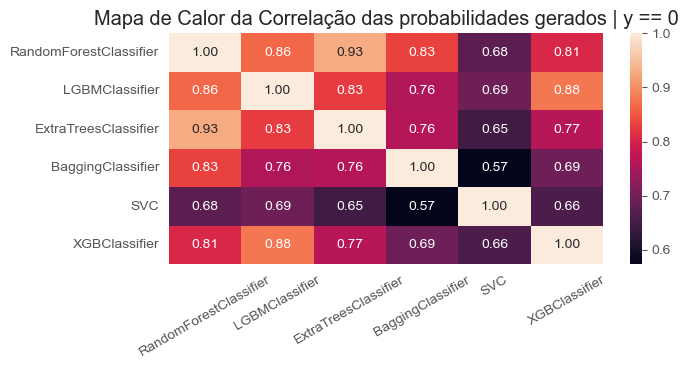

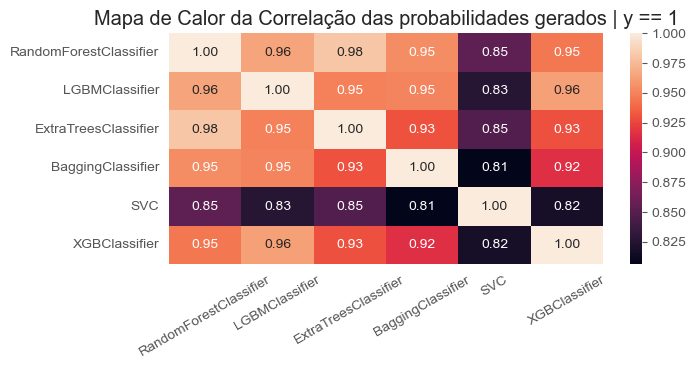

In [47]:
plt.figure(figsize=(7, 3))
sns.heatmap(correlacao_modelos_y0, annot=True, fmt=".2f")#, cmap='plasma')
plt.xticks(rotation=30)
plt.title('Mapa de Calor da Correlação das probabilidades gerados | y == 0')
plt.show()
####################################################################################
plt.figure(figsize=(7, 3))
sns.heatmap(correlacao_modelos_y1, annot=True, fmt=".2f")#, cmap='plasma')
plt.xticks(rotation=30)
plt.title('Mapa de Calor da Correlação das probabilidades gerados | y == 1')
plt.show()

# ================================================================

# Analise F-Beta das Diferenças

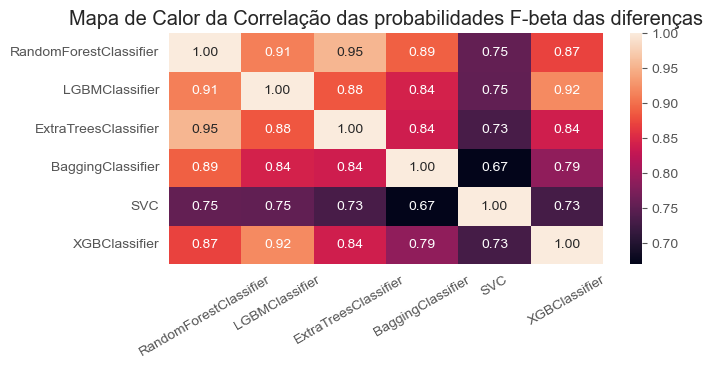

In [48]:
beta = 1#.5

delta_y1 = (1 - correlacao_modelos_y1)
#display(delta_y1.round(2))
delta_y0 = (1 - correlacao_modelos_y0)
#display(delta_y0.round(2))

# F-beta Score
denom_fb_score = (beta**2 * correlacao_modelos_y0) + correlacao_modelos_y1
escore_beta = (1 + beta**2) * (correlacao_modelos_y0 * correlacao_modelos_y1) / denom_fb_score
#############################################################################################

plt.figure(figsize=(7, 3))
sns.heatmap(escore_beta, annot=True, fmt=".2f")#, cmap='plasma')
plt.xticks(rotation=30)
plt.title('Mapa de Calor da Correlação das probabilidades F-beta das diferenças')
plt.show()

# ================================================================

# Analisando combinações de thresholds

In [49]:
from itertools import combinations

# Gerando todas as combinações de 3 itens
combinacoes_modelos = list(combinations(lista_modelos, 3))
combinacoes_modelos

[('RandomForestClassifier', 'LGBMClassifier', 'ExtraTreesClassifier'),
 ('RandomForestClassifier', 'LGBMClassifier', 'BaggingClassifier'),
 ('RandomForestClassifier', 'LGBMClassifier', 'SVC'),
 ('RandomForestClassifier', 'LGBMClassifier', 'XGBClassifier'),
 ('RandomForestClassifier', 'ExtraTreesClassifier', 'BaggingClassifier'),
 ('RandomForestClassifier', 'ExtraTreesClassifier', 'SVC'),
 ('RandomForestClassifier', 'ExtraTreesClassifier', 'XGBClassifier'),
 ('RandomForestClassifier', 'BaggingClassifier', 'SVC'),
 ('RandomForestClassifier', 'BaggingClassifier', 'XGBClassifier'),
 ('RandomForestClassifier', 'SVC', 'XGBClassifier'),
 ('LGBMClassifier', 'ExtraTreesClassifier', 'BaggingClassifier'),
 ('LGBMClassifier', 'ExtraTreesClassifier', 'SVC'),
 ('LGBMClassifier', 'ExtraTreesClassifier', 'XGBClassifier'),
 ('LGBMClassifier', 'BaggingClassifier', 'SVC'),
 ('LGBMClassifier', 'BaggingClassifier', 'XGBClassifier'),
 ('LGBMClassifier', 'SVC', 'XGBClassifier'),
 ('ExtraTreesClassifier', 'Ba

In [50]:
len(combinacoes_modelos)

20

In [51]:
grade_thresholds = pd.DataFrame()

for i in range(len(combinacoes_modelos)):
    print('combinacao n:', i)

    lista = list(combinacoes_modelos[i])
    nome_combinacao = "\n".join(lista)

    modelos_escolhidos = lista
    modelos_escolhidos.append('y')

    fd_previsoes = df_previsoes[modelos_escolhidos]

    grade_thresholds_temp = gridsearch_mult_models_threshold(fd_previsoes, beta=1.5, linspace_thresholds = list(range(0, 95, 10)) )
    grade_thresholds_temp['nome_comp'] = nome_combinacao
    grade_thresholds_temp['m1'] = lista[0]
    grade_thresholds_temp['m2'] = lista[1]
    grade_thresholds_temp['m3'] = lista[2]

    grade_thresholds = pd.concat([grade_thresholds, grade_thresholds_temp])

grade_thresholds = grade_thresholds.round(2)
print('finish')

combinacao n: 0
combinacao n: 1
combinacao n: 2
combinacao n: 3
combinacao n: 4
combinacao n: 5
combinacao n: 6
combinacao n: 7
combinacao n: 8
combinacao n: 9
combinacao n: 10
combinacao n: 11
combinacao n: 12
combinacao n: 13
combinacao n: 14
combinacao n: 15
combinacao n: 16
combinacao n: 17
combinacao n: 18
combinacao n: 19
finish


In [52]:
grade_thresholds.shape

(20000, 26)

In [53]:
colunas = ['precisao', 'sensibilidade', 'f1', 'fb_score']
fig = px.box(grade_thresholds, y=colunas, color = 'nome_comp')
fig.show()

In [54]:
colunas_uteis = ['nome_comp', 'threshold', 
                 'tn', 'fp', 'fn', 'tp', 
                 'precisao', 'sensibilidade', 
                 'f1', 'fb_score',
                 0, 1, 2,
                 'm1','m2','m3'
                 ]
grade_thresholds = grade_thresholds[colunas_uteis]
grade_thresholds = grade_thresholds.sort_values('fb_score', ascending=False)
grade_thresholds = grade_thresholds.head(100)
grade_thresholds = grade_thresholds.reset_index()
grade_thresholds

index                                          nome_comp     threshold  \
0      212             LGBMClassifier\nBaggingClassifier\nSVC  (20, 10, 20)   
1      412     RandomForestClassifier\nBaggingClassifier\nSVC  (40, 10, 20)   
2      414  RandomForestClassifier\nExtraTreesClassifier\nSVC  (40, 10, 40)   
3      215  RandomForestClassifier\nLGBMClassifier\nBaggin...  (20, 10, 50)   
4      430         RandomForestClassifier\nSVC\nXGBClassifier   (40, 30, 0)   
..     ...                                                ...           ...   
105    403        RandomForestClassifier\nLGBMClassifier\nSVC   (40, 0, 30)   
106    402        RandomForestClassifier\nLGBMClassifier\nSVC   (40, 0, 20)   
107    480  RandomForestClassifier\nExtraTreesClassifier\n...   (40, 80, 0)   
108    217  RandomForestClassifier\nLGBMClassifier\nXGBCla...  (20, 10, 70)   
109    219  RandomForestClassifier\nLGBMClassifier\nXGBCla...  (20, 10, 90)   

       tn   fp  fn   tp  precisao  sensibilidade    f1  fb_score   0   1   2  \
0    2220   93  57  130      0.58           0.70  0.63      0.66  20  10  20   
1    2265   48  68  119      0.71           0.64  0.67      0.66  40  10  20   
2    2271   42  72  115      0.73           0.61  0.67      0.65  40  10  40   
3    2190  123  52  135      0.52           0.72  0.61      0.65  20  10  50   
4    2265   48  70  117      0.71           0.63  0.66      0.65  40  30   0   
..    ...  ...  ..  ...       ...            ...   ...       ...  ..  ..  ..   
105  2265   48  70  117      0.71           0.63  0.66      0.65  40   0  30   
106  2260   53  68  119      0.69           0.64  0.66      0.65  40   0  20   
107  2278   35  74  113      0.76           0.60  0.67      0.65  40  80   0   
108  2191  122  52  135      0.53           0.72  0.61      0.65  20  10  70   
109  2191  122  52  135      0.53           0.72  0.61      0.65  20  10  90   

                         m1                    m2                 m3  
0            LGBMClassifier     BaggingClassifier                SVC  
1    RandomForestClassifier     BaggingClassifier                SVC  
2    RandomForestClassifier  ExtraTreesClassifier                SVC  
3    RandomForestClassifier        LGBMClassifier  BaggingClassifier  
4    RandomForestClassifier                   SVC      XGBClassifier  
..                      ...                   ...                ...  
105  RandomForestClassifier        LGBMClassifier                SVC  
106  RandomForestClassifier        LGBMClassifier                SVC  
107  RandomForestClassifier  ExtraTreesClassifier  BaggingClassifier  
108  RandomForestClassifier        LGBMClassifier      XGBClassifier  
109  RandomForestClassifier        LGBMClassifier      XGBClassifier  

[110 rows x 17 columns]

In [58]:
grade_thresholds['fb_score'].describe()

count    110.000000
mean       0.650182
std        0.001342
min        0.650000
25%        0.650000
50%        0.650000
75%        0.650000
max        0.660000
Name: fb_score, dtype: float64

In [57]:
grade_thresholds['nome_comp'].value_counts()

nome_comp
RandomForestClassifier\nLGBMClassifier\nSVC                        22
RandomForestClassifier\nLGBMClassifier\nExtraTreesClassifier       20
RandomForestClassifier\nLGBMClassifier\nBaggingClassifier          19
RandomForestClassifier\nBaggingClassifier\nSVC                     11
LGBMClassifier\nBaggingClassifier\nSVC                             10
RandomForestClassifier\nLGBMClassifier\nXGBClassifier               7
RandomForestClassifier\nBaggingClassifier\nXGBClassifier            6
RandomForestClassifier\nExtraTreesClassifier\nBaggingClassifier     5
RandomForestClassifier\nExtraTreesClassifier\nSVC                   3
RandomForestClassifier\nSVC\nXGBClassifier                          3
RandomForestClassifier\nExtraTreesClassifier\nXGBClassifier         2
LGBMClassifier\nSVC\nXGBClassifier                                  2
Name: count, dtype: int64

In [56]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        dimensions = list([
            dict(range = [0, 1], label = 'precisao', values = grade_thresholds['precisao']),
            dict(range = [0, 1], label = 'sensibilidade', values = grade_thresholds['sensibilidade']),
            dict(range = [0, 1], label = 'f1', values = grade_thresholds['f1']),
            dict(range = [0, 1], label = 'fb_score', values = grade_thresholds['fb_score'])
        ])
    )
)

fig.show()

# avaliando como o modelo trabalha

In [63]:
#for linha in range(len(grade_thresholds)):
linha = grade_thresholds.index[1]
m1, m2, m3 = grade_thresholds['m1'][linha], grade_thresholds['m2'][linha], grade_thresholds['m3'][linha]
############print(m1, m2, m3)

####################################################################################
corte1, corte2, corte3 = grade_thresholds[0][linha], grade_thresholds[1][linha], grade_thresholds[2][linha]
############print(corte1, corte2, corte3)

####################################################################################
df_previsoes_filter0 = df_previsoes[['y', m1, m2, m3]]
df_previsoes_filter = df_previsoes_filter0
############df_previsoes_filter.sample(5)

####################################################################################
df_previsoes_filter['m1_bin'] = np.where(df_previsoes_filter[m1] > corte1, 1, 0)
df_previsoes_filter['m2_bin'] = np.where(df_previsoes_filter[m2] > corte2, 1, 0)
df_previsoes_filter['m3_bin'] = np.where(df_previsoes_filter[m3] > corte3, 1, 0)

df_previsoes_filter['decisao_final'] = df_previsoes_filter['m1_bin'] + df_previsoes_filter['m2_bin'] + df_previsoes_filter['m3_bin']
df_previsoes_filter['decisao_final'] = np.where(df_previsoes_filter['decisao_final'] >= 2, 1, 0)
############df_previsoes_filter.sample(5)

####################################################################################
colunas_avaliadas = ['m1_bin','m2_bin','m3_bin','decisao_final','y']
df_previsoes_filter = df_previsoes_filter#[df_previsoes_filter['y'] == 1].reset_index(drop=True)
fig = px.parallel_categories(df_previsoes_filter[colunas_avaliadas], 
                            color='decisao_final', 
                            color_continuous_scale=px.colors.diverging.Tealrose,
                            color_continuous_midpoint=0.5)
fig.update_layout(title=grade_thresholds['nome_comp'][linha])
fig.show()

####################################################################################
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df_previsoes_filter0['y'],
                   colorscale = [[0,'grey'], [1,'red']]),
        dimensions = list([
            dict(range = [0, 100],
                label = m1, values = df_previsoes_filter0[m1]),
            dict(range = [0, 100],
                label = m2, values = df_previsoes_filter0[m2]),
            dict(range = [0, 100],
                label = m3, values = df_previsoes_filter0[m3]),
            dict(range = [0, 1],
                #constraintrange = [0.5,1],
                label = 'y', values = df_previsoes_filter0['y'])
        ])
    )
)
fig.show()
####################################################################################


In [65]:
print(corte1, corte2, corte3)

40 10 20


# Criando Pós Roc

In [66]:
print(m1, m2, m3)

RandomForestClassifier BaggingClassifier SVC


RandomForestClassifier(random_state=3141592)

In [68]:
import shap

# Assumindo que você já tem um modelo treinado (model) e os dados (x)
explainer = shap.Explainer(model_dict['RandomForestClassifier'], x)  # Pode ser TreeExplainer para modelos de árvore, KernelExplainer para modelos gerais
shap_values = explainer(x)

# Plotando a explicação para um único paciente (por exemplo, o paciente de índice 0)
shap.initjs()  # Para inicializar a visualização interativa no notebook
shap.force_plot(explainer.expected_value[1], shap_values[0][:, 1], x.iloc[0, :])


100%|===================| 19934/20000 [03:18<00:00]        

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [71]:
# Ajustar para usar shap_values como uma instância shap.Explanation
shap.force_plot(explainer.expected_value[1], shap_values[0].values, pd.DataFrame(x).iloc[0, :], matplotlib=True)

# Alternativa para visualizar usando Matplotlib
plt.show()

NotImplementedError: matplotlib = True is not yet supported for force plots with multiple samples!

In [ ]:
shap.summary_plot(shap_values, x)

# ======

In [ ]:
from lime import lime_tabular

# Assumindo que você tem um modelo treinado (model) e dados (x)
explainer = lime_tabular.LimeTabularExplainer(
    training_data=x.values,
    feature_names=x.columns,
    class_names=['Classe_0', 'Classe_1'],  # Ajuste conforme as classes do modelo
    mode='classification'  # Para modelos de classificação
)

# Explicando a previsão de um exemplo específico (por exemplo, índice 0)
i = 0
exp = explainer.explain_instance(x.iloc[i], model_dict['RandomForestClassifier'].predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)
